# Topological Fractal Dimension of Protein-Protein Interaction Networks

## TFD for Path and Lattice Graphs

#### Load

In [18]:
from tfdppin import graphs
from tfdppin import TFD

import matplotlib.pylab as plt
import networkx as nx
import numpy as np
import os.path
import time
import seaborn as sns

sns.set(style="ticks")

### Study of TFD $d$ versus number of nodes $N$ (w/ and w/o PBC) w/FUZZY

In [19]:
def d_vs_N_fuzzy(graph_builder, Nmin=10, Nmax=100, Nstep=5, PBC=False):
    N = np.arange(Nmin, Nmax, Nstep, dtype=int)
    d = np.zeros(len(N))
    
    tot_time = 0
    for idx, n in enumerate(N):
        print("TDF #{} of {}".format(idx+1, len(N)), end=" ")
        ti = time.time()
        
        Gl = graph_builder(n, PBC)
        p, lb, Nb  = TFD.tfd_fuzzy(Gl)
        d[idx] = p[0]
        
        t = time.time() - ti
        print("({:.2f}s)".format(t))
        tot_time += t
        
    print("({:.2f}s)".format(tot_time))
        
    return N, d

In [20]:
fname_path = "data/fse_path.dat"

if not os.path.isfile(fname_path):
    print("---P NO PBC---")
    Np, dp_nopbc = d_vs_N_fuzzy(graphs.build_path_graph, Nmin=10, Nmax=61, Nstep=6, PBC=False)
    print("---P PBC---")
    Np, dp_pbc = d_vs_N_fuzzy(graphs.build_path_graph,  Nmin=10, Nmax=61, Nstep=6, PBC=True)
    
    np.savetxt(fname_path, np.stack((Np, dp_nopbc, dp_pbc), axis=1))
else:
    Np, dp_nopbc, dp_pbc = np.loadtxt(fname_path, unpack=True)
    
fname_lattice = "data/fse_lattice.dat"
    
if not os.path.isfile(fname_lattice):
    print("---P NO PBC---")
    Nl, dl_nopbc = d_vs_N_fuzzy(graphs.build_lattice_graph, Nmin=6, Nmax=61, Nstep=6, PBC=False)
    print("---P PBC---")
    Nl, dl_pbc = d_vs_N_fuzzy(graphs.build_lattice_graph, Nmin=6, Nmax=61, Nstep=6, PBC=True)
    
    np.savetxt(fname_lattice, np.stack((Nl, dl_nopbc, dl_pbc), axis=1))
else:
    Nl, dl_nopbc, dl_pbc = np.loadtxt(fname_lattice, unpack=True)
    
    


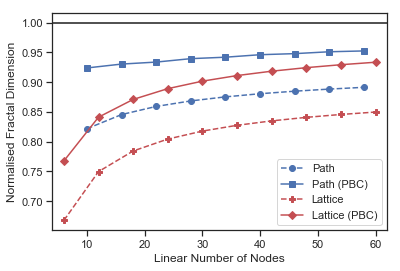

In [21]:
plt.figure()
plt.plot(Np, dp_nopbc / 1, "ob--", label="Path")
plt.plot(Np, dp_pbc / 1, "sb-", label="Path (PBC)")
plt.plot(Nl, dl_nopbc / 2, "Pr--", label="Lattice")
plt.plot(Nl, dl_pbc / 2, "Dr-", label="Lattice (PBC)")
plt.hlines(1, -1, 1000)
plt.xlim((min(Np[0], Nl[0]) - 2, max(Np[-1], Nl[-1]) + 2))
plt.legend()
plt.xlabel("Linear Number of Nodes")
plt.ylabel("Normalised Fractal Dimension")
plt.savefig("fse_fuzzy.pdf")
plt.show()

### Study of TFD $d$ versus number of nodes $N$ w/FUZZY and w/BURNING

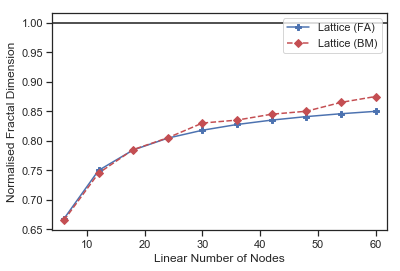

In [22]:
plt.figure()

plt.hlines(1, -1, 1000)
plt.xlim((min(Np[0], Nl[0]) - 2, max(Np[-1], Nl[-1]) + 2))

#plt.plot(Np, dp_nopbc / 1, "ob-", label="Path (FA)")

#fractals=np.array([0.82,0.85,0.87,0.91,0.915,0.92,0.925,0.93,0.935,0.94])
#lengths=np.array([6,12,18,24,30,36,42,48,54,60])
#plt.plot(lengths, fractals / 1, "sr--", label="Path (BM)")


plt.plot(Nl, dl_nopbc / 2, "Pb-", label="Lattice (FA)")

fractals=np.array([1.33,1.49,1.57,1.61,1.66,1.67,1.69,1.70,1.73,1.75])
lengths=np.array([6,12,18,24,30,36,42,48,54,60])
plt.plot(lengths, fractals / 2, "Dr--", label="Lattice (BM)")

plt.legend()
plt.xlabel("Linear Number of Nodes")
plt.ylabel("Normalised Fractal Dimension")
plt.savefig("fuzzy_vs_burning.pdf")
plt.show()

### Study of $N_B$ versus $l_B$ for Path (w/ and w/o PBC)

TDF Path: 0.9043331610391334
TDF Path: 0.9629929431309521


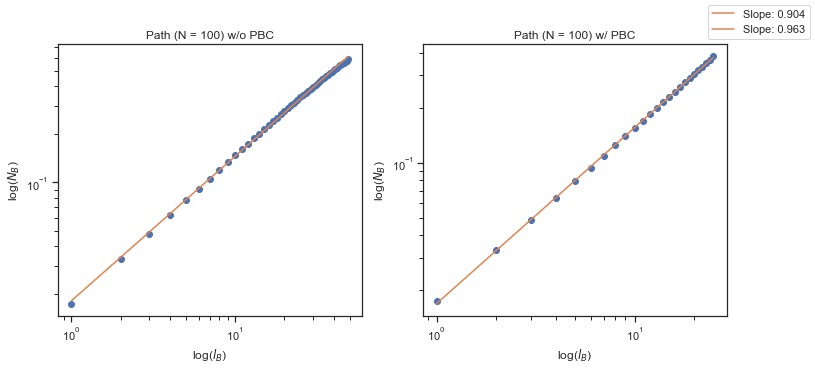

In [23]:
N = 100

f = plt.figure(figsize=(12, 5))

G = graphs.build_path_graph(N, pbc=False)
p, lb, Nb = TFD.tfd_fuzzy(G)
print("TDF Path:", p[0])

f.add_subplot(1, 2, 1)
plt.title("Path (N = {}) w/o PBC".format(N))
plt.xlabel("log($l_B$)")
plt.ylabel("log($N_B$)")
plt.loglog(lb, Nb, 'o')

x = np.linspace(min(np.log(lb)), max(np.log(lb)), 100)
plt.loglog(np.exp(x), np.exp(x * p[0] + p[1]), label="Slope: {:.3f}".format(p[0]))

G = graphs.build_path_graph(N, pbc=True)
p, lb, Nb = TFD.tfd_fuzzy(G)
print("TDF Path:", p[0])

f.add_subplot(1, 2, 2)
plt.title("Path (N = {}) w/ PBC".format(N))
plt.xlabel("log($l_B$)")
plt.ylabel("log($N_B$)")
plt.loglog(lb, Nb, 'o')

x = np.linspace(min(np.log(lb)), max(np.log(lb)), 100)
plt.loglog(np.exp(x), np.exp(x * p[0] + p[1]), label="Slope: {:.3f}".format(p[0]))

f.legend()
plt.show()

### Study of TFD $d$ versus number of nodes $N$ (w/o PBC) w/GREEDY, BURNING and FUZZY

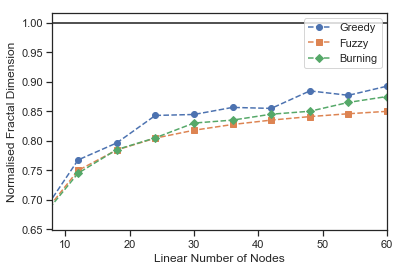

In [36]:
plt.figure()

Ng, dg, _ = np.loadtxt("data/fse_lattice_greedy.dat", unpack=True)
plt.plot(Ng, dg / 2, "o--", label="Greedy")

Nf, df, _ = np.loadtxt("data/fse_lattice.dat", unpack=True)
plt.plot(Nf, df / 2, "s--", label="Fuzzy")

fractals=np.array([1.33,1.49,1.57,1.61,1.66,1.67,1.69,1.70,1.73,1.75])
lengths=np.array([6,12,18,24,30,36,42,48,54,60])
plt.plot(lengths, fractals / 2, "D--", label="Burning")

plt.hlines(1, -1, 1000)
plt.xlim((min(Np[0], Nl[0]) - 2, max(Np[-1], Nl[-1]) + 2))
plt.legend()
plt.xlabel("Linear Number of Nodes")
plt.ylabel("Normalised Fractal Dimension")
plt.savefig("fse_comparison.pdf")
plt.show()